In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pickle as pkl

In [2]:
dataX=pandas.read_csv('features_all_data.csv')
datay=pandas.read_csv('label_crime_allmetrics.csv')


In [3]:
dataX.columns

Index(['NeighbourhoodCode', 'Year', 'Month', 'ResponseTimeScore',
       'SlowResponseTimePenalty', 'DayC', 'NightC', 'Rain Days',
       'Rainfall(mm)', 'Daylight hours', 'NuisanceReportsCriminal',
       'NuisanceReportsNonCriminal', 'NetLaborParticipation',
       'FlexibleContracts', 'SelfContract', 'PopulationEduLow',
       'PopulationEduMedium', 'PopulationEduHigh', 'y0-15%', 'y15-25%',
       'y65-%', 'Peoplewithmigrationbackgroud%', 'Averagepeopleperhousehold',
       'Populationdensitykm2', 'AverageWOZ-valueofhouses(x1000euro)',
       'Percentuninhabited(%)', 'Rentalproperies(%)', 'Tradeandcatering%',
       'Culture/recreationproperies%', 'Carsperhousehold', 'UrbanityLevel',
       'Inhabitants', 'Benches', 'Lights', 'POI'],
      dtype='object')

In [4]:
datay.columns

Index(['NeighbourhoodCode', 'Year', 'Month', 'PropertyCrimesTotal',
       'PropertyCrimesRelPop', 'PropertyCrimesRelCity', 'ViolentCrimesTotal',
       'ViolentCrimesRelPop', 'ViolentCrimesRelCity', 'BurglariesTotal',
       'BurglariesRelPop', 'BurglariesRelCity'],
      dtype='object')

In [5]:
crimes_total= datay.groupby(by=['NeighbourhoodCode','Year', 'Month'])['BurglariesRelPop'].sum()


In [6]:
crimes_total.head()


NeighbourhoodCode  Year  Month
Bavel              2012  1        1.5162
                         2        0.6065
                         3        0.6065
                         4        0.3032
                         5        1.5162
Name: BurglariesRelPop, dtype: float64

In [7]:
data=pandas.merge(dataX,crimes_total, on=['NeighbourhoodCode','Year','Month'])


In [8]:
data.columns

Index(['NeighbourhoodCode', 'Year', 'Month', 'ResponseTimeScore',
       'SlowResponseTimePenalty', 'DayC', 'NightC', 'Rain Days',
       'Rainfall(mm)', 'Daylight hours', 'NuisanceReportsCriminal',
       'NuisanceReportsNonCriminal', 'NetLaborParticipation',
       'FlexibleContracts', 'SelfContract', 'PopulationEduLow',
       'PopulationEduMedium', 'PopulationEduHigh', 'y0-15%', 'y15-25%',
       'y65-%', 'Peoplewithmigrationbackgroud%', 'Averagepeopleperhousehold',
       'Populationdensitykm2', 'AverageWOZ-valueofhouses(x1000euro)',
       'Percentuninhabited(%)', 'Rentalproperies(%)', 'Tradeandcatering%',
       'Culture/recreationproperies%', 'Carsperhousehold', 'UrbanityLevel',
       'Inhabitants', 'Benches', 'Lights', 'POI', 'BurglariesRelPop'],
      dtype='object')

In [9]:
data = data[['NeighbourhoodCode', 'Populationdensitykm2', 'SlowResponseTimePenalty', 'Percentuninhabited(%)', 'Inhabitants', 'ResponseTimeScore', 'Tradeandcatering%','BurglariesRelPop','Year']]


In [23]:
data

,NeighbourhoodCode,Populationdensitykm2,SlowResponseTimePenalty,Percentuninhabited(%),Inhabitants,ResponseTimeScore,Tradeandcatering%,BurglariesRelPop,Year,Burglaries1k
0,Bavel,3109,1.0,2,5445,0.00,0.141,1.5162,2012,0.28
1,Bavel,3109,1.0,2,5445,0.00,0.141,0.6065,2012,0.11
2,Bavel,3109,1.0,2,5445,0.00,0.141,0.6065,2012,0.11
3,Bavel,3109,1.0,2,5445,0.00,0.141,0.3032,2012,0.06
4,Bavel,3109,1.0,2,5445,0.00,0.141,1.5162,2012,0.28
...,...,...,...,...,...,...,...,...,...,...
7915,Zandberg,6976,3.0,5,5135,0.83,0.151,0.0000,2022,0.00
7916,Zandberg,6976,2.9,5,5135,0.87,0.151,0.3032,2022,0.06
7917,Zandberg,6976,2.1,5,5135,0.87,0.151,0.0000,2022,0.00
7918,Zandberg,6976,3.3,5,5135,0.84,0.151,0.0000,2022,0.00


In [10]:
data['Burglaries1k']=(data['BurglariesRelPop']/data['Inhabitants'])*1000
data['Burglaries1k']=data['Burglaries1k'].round(2)

In [11]:
X=data.drop(columns=['NeighbourhoodCode','Year','Inhabitants','BurglariesRelPop','Burglaries1k'], axis=1)
y=data['Burglaries1k']

In [12]:
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [13]:

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [14]:
#Training the model with different features (checking smth)
'''from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 500,1000],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_features': [3, 5, 7],
    'max_depth': [2, 3, 4]
}

# Perform grid search to find the best combination of parameters
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(loss='squared_error'), param_grid=param_grid, cv=5)
grid_search.fit(X_train_std, y_train)

# Get the best model and its performance
best_gbr = grid_search.best_estimator_
best_accuracy = mean_squared_error(y_test, best_gbr.predict(X_test_std))'''

"from sklearn.model_selection import GridSearchCV\n\n# Define the parameter grid to search\nparam_grid = {\n    'n_estimators': [100, 500,1000],\n    'learning_rate': [0.001, 0.01, 0.1],\n    'max_features': [3, 5, 7],\n    'max_depth': [2, 3, 4]\n}\n\n# Perform grid search to find the best combination of parameters\ngrid_search = GridSearchCV(estimator=GradientBoostingRegressor(loss='squared_error'), param_grid=param_grid, cv=5)\ngrid_search.fit(X_train_std, y_train)\n\n# Get the best model and its performance\nbest_gbr = grid_search.best_estimator_\nbest_accuracy = mean_squared_error(y_test, best_gbr.predict(X_test_std))"

In [15]:
gbr= GradientBoostingRegressor(n_estimators=2000,learning_rate=0.01,max_features=9, max_depth= 4,loss='squared_error')


In [16]:
gbr.fit(X_train_std,y_train)


GradientBoostingRegressor(learning_rate=0.01, max_depth=4, max_features=9,
                          n_estimators=2000)

In [17]:
y_pred=(gbr.predict(X_test_std)).round(2)


In [18]:
accuracy=mean_squared_error(y_test,y_pred)
accuracy

4.818494886363636

In [19]:
results= pandas.DataFrame(y_pred,y_test)
results

,0
Burglaries1k,
0.00,0.06
0.00,0.06
0.00,0.11
4.04,2.97
0.00,5.47
...,...
2.06,0.89
0.08,0.01
0.12,0.05


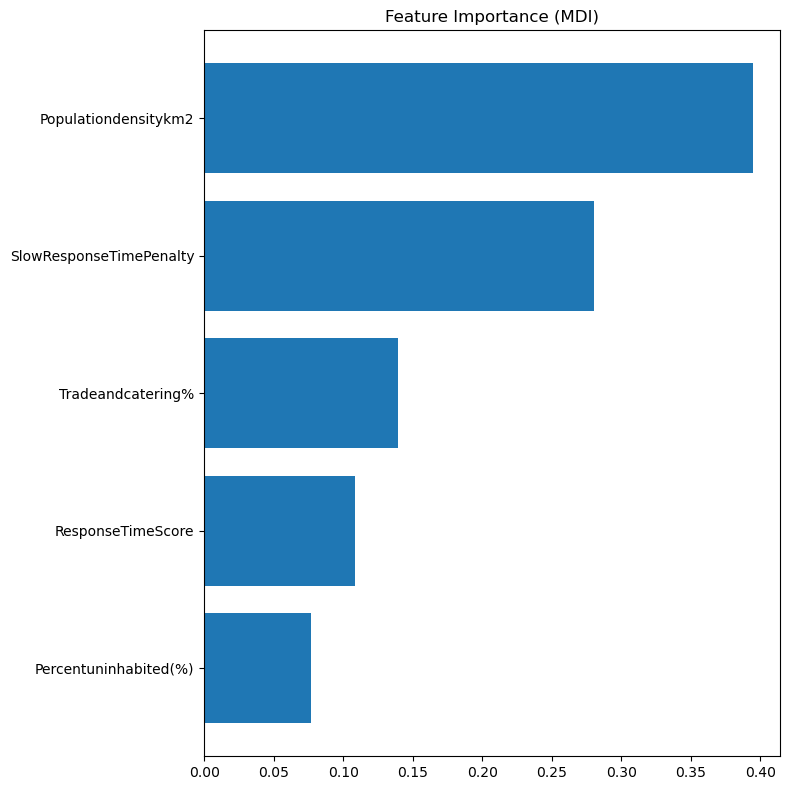

In [20]:
from sklearn.inspection import permutation_importance
#
# Get Feature importance data using feature_importances_ attribute
#
feature_importance = gbr.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')
result = permutation_importance(gbr, X_test_std, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
fig.tight_layout()
plt.show()

In [21]:
filename = 'model_kornelia_dashboard.sav'
pkl.dump(gbr, open(filename, 'wb'))

In [22]:
gbr.columns

AttributeError: 'GradientBoostingRegressor' object has no attribute 'columns'